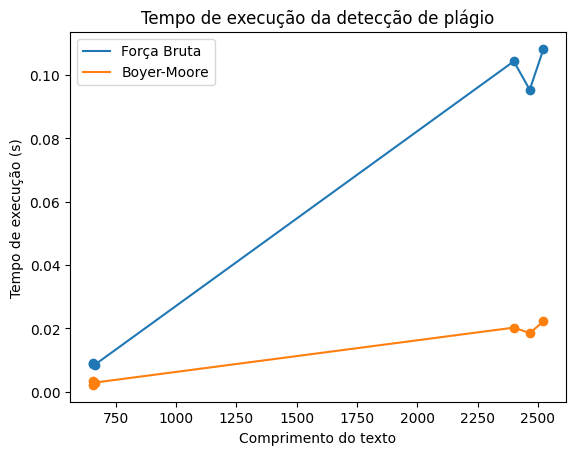

In [111]:
import time
import matplotlib.pyplot as plt

def busca_forca_bruta(text, pattern):
    m = len(pattern)
    n = len(text)

    for i in range(n - m + 1):
        match = True
        for j in range(m):
            if text[i + j] != pattern[j]:
                match = False
                break
        if match:
            return i  # Padrão encontrado
    return -1  # Não encontrado


def busca_boyer_moore(text, pattern):
    # Função de busca Boyer-Moore para localizar padrão no texto
    m = len(pattern)
    n = len(text)

    # Construir a tabela de deslocamento para "bad character"
    bad_char_shift = {}
    for i in range(m - 1):
        bad_char_shift[pattern[i]] = m - i - 1

    # Inicializar o deslocamento
    shift = 0
    while shift <= n - m:
        j = m - 1
        while j >= 0 and pattern[j] == text[shift + j]:
            j -= 1

        if j < 0:
            # Padrão encontrado
            return shift
        else:
            # Deslocamento baseado no caractere ruim
            bad_char = text[shift + j]
            shift += bad_char_shift.get(bad_char, m)
    return -1  # Não encontrado


def detecta_plagio(doc1, doc2, tipo, frase_length=2):
    palavras1 = doc1.split()
    palavras2 = doc2.split()
    
    total_frases = 0
    matching_frases = 0

    for i in range(len(palavras1) - frase_length + 1):
        frase = ' '.join(palavras1[i:i + frase_length])
        total_frases += 1

        if tipo == 'forca bruta':
            # Verificar se a frase existe no doc2 usando Força Bruta
            if busca_forca_bruta(' '.join(palavras2), frase) != -1:
                matching_frases += 1  # Contador de frases coincidentes
        else:
            # Verificar se a frase existe no doc2 usando Boyer-Moore
            if busca_boyer_moore(' '.join(palavras2), frase) != -1:
                matching_frases += 1  # Contador de frases coincidentes

    # Calcular porcentagem de plágio
    percentual_plagio = (matching_frases / total_frases) * 100 if total_frases > 0 else 0

    # print(f"Pocentagem de plagio {tipo}: {percentual_plagio:.2f}%")
    # print(f"Frases coincidentes: {matching_frases} de {total_frases}")
    

    return percentual_plagio, matching_frases, total_frases


# Função para ler arquivos 

def leArquivo(nomeArquivo):
    with open(nomeArquivo, 'r') as file:
        return file.read()


a = leArquivo('docs/texto-a.txt')
b = leArquivo('docs/texto-b.txt')
a1 = leArquivo('docs/texto-a1.txt')
a2 = leArquivo('docs/texto-a2.txt')
b1 = leArquivo('docs/texto-b1.txt')
b2 = leArquivo('docs/texto-b2.txt')

arquivos = [a, a1, a2, b, b1, b2]

# comprimento da frase
lenth_text = [len(a), len(a1), len(a2), len(b1), len(b), len(b2)]
tempo_forca_bruta = []
tempo_boyer_moore = []

for doc in arquivos:
    start_time = time.time()
    detecta_plagio(doc, doc, 'forca bruta')
    tempo_forca_bruta.append(time.time() - start_time)

    start_time = time.time()
    detecta_plagio(doc, doc, 'boyer-moore')
    tempo_boyer_moore.append(time.time() - start_time)

    

# Gráfico
fig, ax = plt.subplots()
ax.plot(lenth_text, tempo_forca_bruta, label='Força Bruta')
ax.plot(lenth_text, tempo_boyer_moore, label='Boyer-Moore')
# plotar os pontos 
ax.scatter(lenth_text, tempo_forca_bruta)
ax.scatter(lenth_text, tempo_boyer_moore)
# adicionar legenda

ax.set_xlabel('Comprimento do texto')
ax.set_ylabel('Tempo de execução (s)')
ax.set_title('Tempo de execução da detecção de plágio')
ax.legend()
plt.show()





In [114]:
len_arquivos = [len(a), len(a1), len(a2), len(b), len(b1), len(b2)]
percentual_plagio_forca_bruta = []
percentual_plagio_boyer_moore = []
frases_coincidentes_forca_bruta = []
frases_coincidentes_boyer_moore = []
total_frases = []
tempo_boyer_moore = []
tempo_forca_bruta = []

# comparar a com a1, a com a2, a com b, a com b1, a com b2, a1 com a2, a1 com b, a1 com b1, a1 com b2, a2 com b, a2 com b1, a2 com b2, b com b1, b com b2, b1 com b2

for i in range(len(arquivos)):
    for j in range(i + 1, len(arquivos)):
        print(f"Comparando texto {i + 1} com texto {j + 1}")
        start_time = time.time()
        percentual, frases_coincidentes, total = detecta_plagio(arquivos[i], arquivos[j], 'forca bruta')
        tempo_forca_bruta.append(time.time() - start_time)
        percentual_plagio_forca_bruta.append(percentual)
        frases_coincidentes_forca_bruta.append(frases_coincidentes)
        total_frases.append(total)

        start_time = time.time()
        percentual, frases_coincidentes, total = detecta_plagio(arquivos[i], arquivos[j], 'boyer-moore')
        tempo_boyer_moore.append(time.time() - start_time)
        percentual_plagio_boyer_moore.append(percentual)
        frases_coincidentes_boyer_moore.append(frases_coincidentes)




Comparando texto 1 com texto 2
Comparando texto 1 com texto 3
Comparando texto 1 com texto 4
Comparando texto 1 com texto 5
Comparando texto 1 com texto 6
Comparando texto 2 com texto 3
Comparando texto 2 com texto 4
Comparando texto 2 com texto 5
Comparando texto 2 com texto 6
Comparando texto 3 com texto 4
Comparando texto 3 com texto 5
Comparando texto 3 com texto 6
Comparando texto 4 com texto 5
Comparando texto 4 com texto 6
Comparando texto 5 com texto 6


In [115]:
# Leitura de arquivos e criação de dicionário
arquivos_A = {
    'A': leArquivo('docs/texto-a.txt'),
    'A1': leArquivo('docs/texto-a1.txt'),
    'A2': leArquivo('docs/texto-a2.txt')
}

arquivos_B = {
    'B': leArquivo('docs/texto-b.txt'),
    'B1': leArquivo('docs/texto-b1.txt'),
    'B2': leArquivo('docs/texto-b2.txt')
}

# Adicionando texto de controle negativo
texto_controle_sem_plagio = "Este texto é completamente diferente e serve como controle negativo."

resultados_A = []  # Lista para armazenar os resultados
resultados_B = []  # Lista para armazenar os resultados
resultados_controle = []  # Lista para armazenar os resultados

# Comparação de Controle Positivo: Texto A consigo mesmo
# print("Comparação de Controle Positivo: Texto A com Texto A")
start_time = time.time()
percentual, frases_coincidentes, total = detecta_plagio(arquivos['Texto A'], arquivos['Texto A'], 'forca bruta')
tempo_fb = time.time() - start_time

start_time = time.time()
percentual_bm, _, _ = detecta_plagio(arquivos['Texto A'], arquivos['Texto A'], 'boyer moore')
tempo_bm = time.time() - start_time

resultados_controle.append({
    'Comparação': 'Texto A vs Texto A (Controle Positivo)',
    'Tamanho 1': len(arquivos['Texto A']),
    'Tamanho 2': len(arquivos['Texto A']),
    'Plágio FB (%)': percentual,
    'Plágio BM (%)': percentual_bm,
    'Tempo FB (s)': tempo_fb,
    'Tempo BM (s)': tempo_bm,
})

# Comparação de Controle Negativo: Texto A com texto completamente diferente
# print("Comparação de Controle Negativo: Texto A com Texto Controle Sem Plágio")
start_time = time.time()
percentual, frases_coincidentes, total = detecta_plagio(arquivos['Texto A'], texto_controle_sem_plagio, 'forca bruta')
tempo_fb = time.time() - start_time

start_time = time.time()
percentual_bm, _, _ = detecta_plagio(arquivos['Texto A'], texto_controle_sem_plagio, 'boyer moore')
tempo_bm = time.time() - start_time

resultados_controle.append({
    'Comparação': 'Texto A vs Texto Controle (Controle Negativo)',
    'Tamanho 1': len(arquivos['Texto A']),
    'Tamanho 2': len(texto_controle_sem_plagio),
    'Plágio FB (%)': percentual,
    'Plágio BM (%)': percentual_bm,
    'Tempo FB (s)': tempo_fb,
    'Tempo BM (s)': tempo_bm,
})

# Comparações principais no loop
nomes_a = list(arquivos_A.keys())
nomes_b = list(arquivos_B.keys())
for i in range(len(nomes_a)):
    # Comparação de Texto A com Texto A1 e depois A com A2
    # print(f"Comparação: Texto A vs {nomes_a[i]}")
    start_time = time.time()
    percentual, frases_coincidentes, total = detecta_plagio(arquivos_A['A'], arquivos_A[nomes_a[i]], 'forca bruta')
    tempo_fb = time.time() - start_time

    start_time = time.time()
    percentual_bm, _, _ = detecta_plagio(arquivos_A['A'], arquivos_A[nomes_a[i]], 'boyer moore')
    tempo_bm = time.time() - start_time

    resultados_A.append({
        'Comparação': f'Texto A vs {nomes_a[i]}',
        'Tamanho 1': len(arquivos_A['A']),
        'Tamanho 2': len(arquivos_A[nomes_a[i]]),
        'Plágio FB (%)': percentual,
        'Plágio BM (%)': percentual_bm,
        'Tempo FB (s)': tempo_fb,
        'Tempo BM (s)': tempo_bm,
    })

    # Comparação de Texto B com Texto B1 e depois B com B2
    # print(f"Comparação: Texto B vs {nomes_b[i]}")
    start_time = time.time()
    percentual, frases_coincidentes, total = detecta_plagio(arquivos_B['B'], arquivos_B[nomes_b[i]], 'forca bruta')
    tempo_fb = time.time() - start_time

    start_time = time.time()
    percentual_bm, _, _ = detecta_plagio(arquivos_B['B'], arquivos_B[nomes_b[i]], 'boyer moore')
    tempo_bm = time.time() - start_time

    resultados_B.append({
        'Comparação': f'Texto B vs {nomes_b[i]}',
        'Tamanho 1': len(arquivos_B['B']),
        'Tamanho 2': len(arquivos_B[nomes_b[i]]),
        'Plágio FB (%)': percentual,
        'Plágio BM (%)': percentual_bm,
        'Tempo FB (s)': tempo_fb,
        'Tempo BM (s)': tempo_bm,
    })
    




# Exibir os resultados em formato tabular para análise
import pandas as pd
df_resultados_a = pd.DataFrame(resultados_A)
df_resultados_b = pd.DataFrame(resultados_B)
# print(df_resultados_a)
# print(df_resultados_b)


TypeError: list indices must be integers or slices, not str

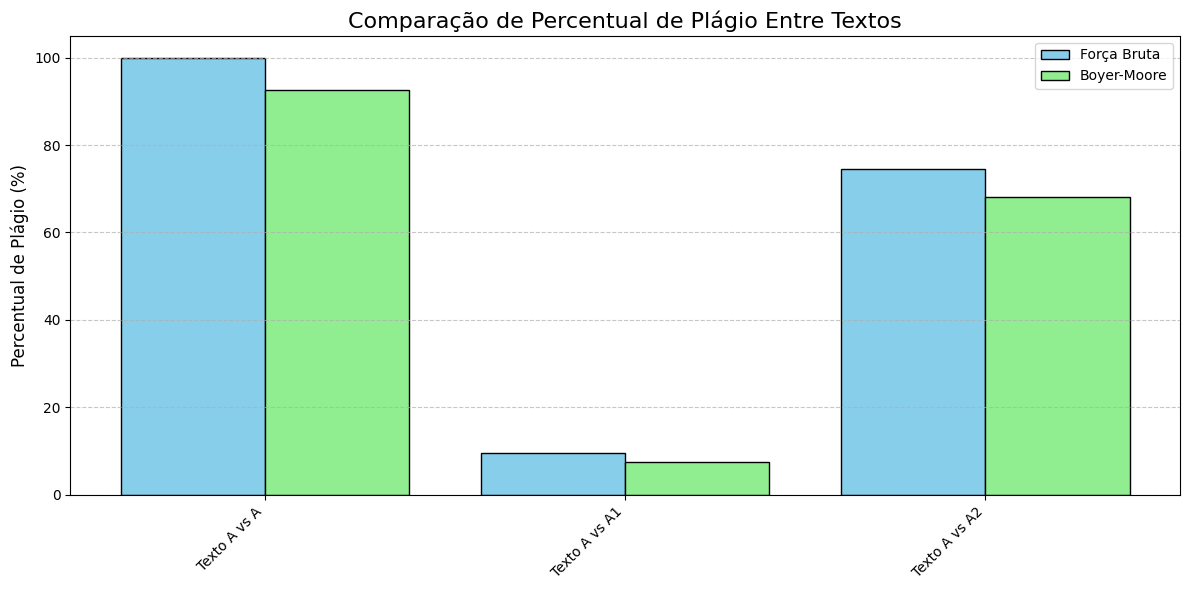

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter resultados para DataFrame
df_resultados = pd.DataFrame(resultados_A)

# Gráfico de barras lado a lado para percentual de plágio
plt.figure(figsize=(12, 6))

# Posições no eixo X para as barras
x = range(len(df_resultados))

# Largura das barras
bar_width = 0.4

# Barras para Força Bruta
plt.bar(
    [p - bar_width / 2 for p in x],
    df_resultados['Plágio FB (%)'],
    width=bar_width,
    label='Força Bruta',
    color='skyblue',
    edgecolor='black'
)

# Barras para Boyer-Moore
plt.bar(
    [p + bar_width / 2 for p in x],
    df_resultados['Plágio BM (%)'],
    width=bar_width,
    label='Boyer-Moore',
    color='lightgreen',
    edgecolor='black'
)

# Configurações do gráfico
plt.xticks(x, df_resultados['Comparação'], rotation=45, ha='right', fontsize=10)
plt.ylabel('Percentual de Plágio (%)', fontsize=12)
plt.title('Comparação de Percentual de Plágio Entre Textos', fontsize=16)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()




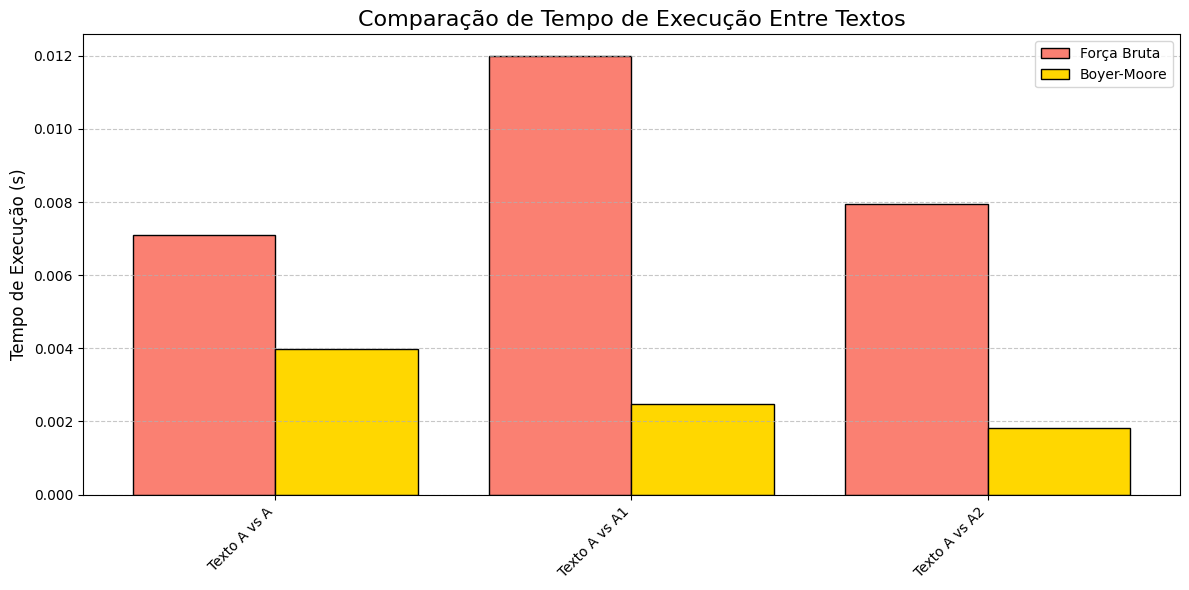

In [64]:
# Gráfico de barras para tempo de execução
plt.figure(figsize=(12, 6))
x = range(len(df_resultados))
plt.bar([p - 0.2 for p in x], df_resultados['Tempo FB (s)'], width=0.4, label='Força Bruta', color='salmon', edgecolor='black')
plt.bar([p + 0.2 for p in x], df_resultados['Tempo BM (s)'], width=0.4, label='Boyer-Moore', color='gold', edgecolor='black')
plt.xticks(x, df_resultados['Comparação'], rotation=45, ha='right')
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.title('Comparação de Tempo de Execução Entre Textos', fontsize=16)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


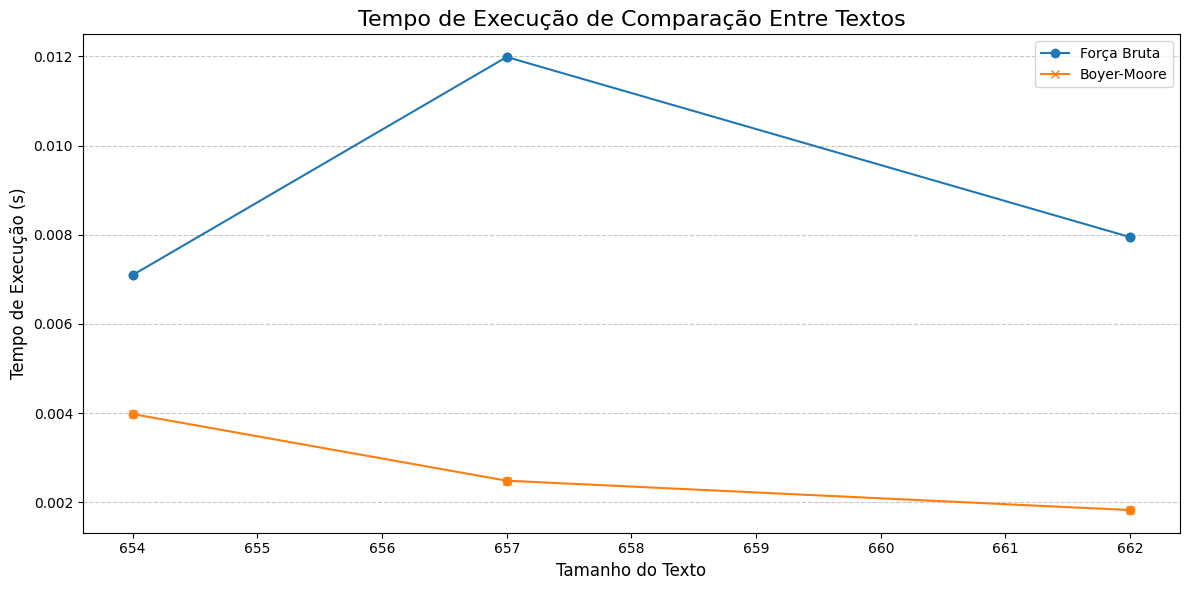

In [69]:
import matplotlib.pyplot as plt

# tamanho dos arquivos 
tamanhos = [len(a), len(a1), len(a2)]
#Tempo de execução de comparação de A com A1, A com A2 e A1 com A2
tempo_fb = df_resultados['Tempo FB (s)']
tempo_bm = df_resultados['Tempo BM (s)']

# Gráfico de linhas para tempo de execução
plt.figure(figsize=(12, 6))
plt.plot(tamanhos, tempo_fb, label='Força Bruta', marker='o')
plt.plot(tamanhos, tempo_bm, label='Boyer-Moore', marker='x')
plt.scatter(tamanhos, tempo_fb)
plt.scatter(tamanhos, tempo_bm)
plt.xlabel('Tamanho do Texto', fontsize=12)
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.title('Tempo de Execução de Comparação Entre Textos', fontsize=16)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [100]:
tamanhos_b = {
    'B': len(b),
    'B1': len(b1),
    'B2': len(b2)
}

# Tempo de execução de comparação de B com B1, B com B2 e B1 com B2
tempo_fb_b = df_resultados_b['Tempo FB (s)']
tempo_bm_b = df_resultados_b['Tempo BM (s)']

tempo_bm_b_dict = { 
    'B': tempo_bm_b[0],
    'B1': tempo_bm_b[1],
    'B2': tempo_bm_b[2]
}

tempo_fb_b_dict = {
    'B': tempo_fb_b[0],
    'B1': tempo_fb_b[1],
    'B2': tempo_fb_b[2]
}

plagio_bm_b_dict = {
    'B': percentual_plagio_boyer_moore[0],
    'B1': percentual_plagio_boyer_moore[1],
    'B2': percentual_plagio_boyer_moore[2]
}

plagio_fb_b_dict = {
    'B': percentual_plagio_forca_bruta[0],
    'B1': percentual_plagio_forca_bruta[1],
    'B2': percentual_plagio_forca_bruta[2]
}

print(tempo_fb_b_dict)

# ordenar dicionario de tamanho de arquivos
tamanhos_b = dict(sorted(tamanhos_b.items(), key=lambda item: item[1]))

# unir dicionarios de acordo com o indice
tempo_fb_b_dict_2 = dict(sorted(tempo_fb_b_dict.items(), key=lambda item: list(tamanhos_b.keys()).index(item[0])))
tempo_bm_b_dict_2 = dict(sorted(tempo_bm_b_dict.items(), key=lambda item: list(tamanhos_b.keys()).index(item[0])))
tamanhos_b_2 = dict(sorted(tamanhos_b.items(), key=lambda item: item[1]))
print(tempo_fb_b_dict_2)
    






{'B': 0.09864640235900879, 'B1': 0.17471694946289062, 'B2': 0.15416765213012695}
{'B1': 0.17471694946289062, 'B': 0.09864640235900879, 'B2': 0.15416765213012695}


In [104]:
tamanhos_b = pd.Series(tamanhos_b)


# fazer um left join entre os dataframes
df_b = pd.DataFrame(tamanhos_b, columns=['Tamanho'])
#left join com os tempos de execução
df_b['Tempo FB (s)'] = df_b.index.map(tempo_fb_b_dict_2)
df_b['Tempo BM (s)'] = df_b.index.map(tempo_bm_b_dict_2)
#left join com os percentuais de plágio
df_b['Plágio FB (%)'] = df_b.index.map(plagio_fb_b_dict)
df_b['Plágio BM (%)'] = df_b.index.map(plagio_bm_b_dict)

print(df_b)

    Tamanho  Tempo FB (s)  Tempo BM (s)  Plágio FB (%)  Plágio BM (%)
B1     2400      0.174717      0.033154      74.468085      68.085106
B      2466      0.098646      0.020916       9.574468       7.446809
B2     2523      0.154168      0.030058      18.085106      14.893617


/tmp/ipykernel_17284/2453114565.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_b['Tamanho'][i], df_b['Tempo FB (s)'][i]))
/tmp/ipykernel_17284/2453114565.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_b['Tamanho'][i], df_b['Tempo BM (s)'][i]))


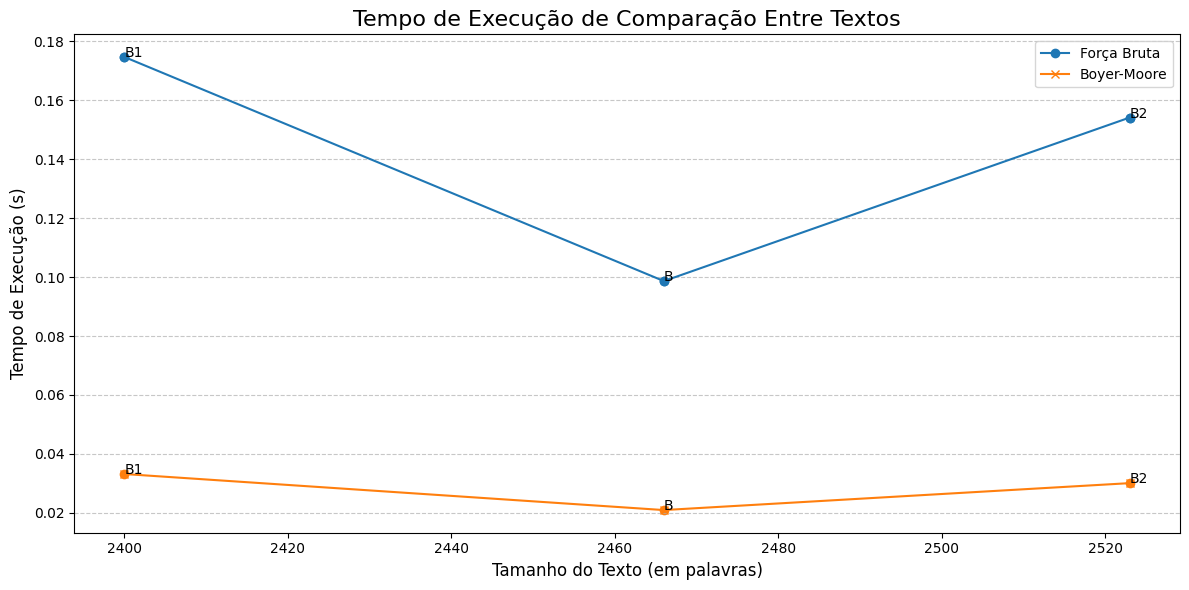

In [89]:


# Gráfico de linhas para tempo de execução
plt.figure(figsize=(12, 6))
plt.plot(df_b['Tamanho'], df_b['Tempo FB (s)'], label='Força Bruta', marker='o')
plt.plot(df_b['Tamanho'], df_b['Tempo BM (s)'], label='Boyer-Moore', marker='x')
plt.scatter(df_b['Tamanho'], df_b['Tempo FB (s)'])
plt.scatter(df_b['Tamanho'], df_b['Tempo BM (s)'])
plt.xlabel('Tamanho do Texto (em palavras)', fontsize=12)
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.title('Tempo de Execução de Comparação Entre Textos', fontsize=16)
# lable nos pontos 
for i, txt in enumerate(df_b.index):
    plt.annotate(txt, (df_b['Tamanho'][i], df_b['Tempo FB (s)'][i]))
    plt.annotate(txt, (df_b['Tamanho'][i], df_b['Tempo BM (s)'][i]))
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_17284/8050269.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_b['Plágio FB (%)'][i], df_b['Tempo FB (s)'][i]))
/tmp/ipykernel_17284/8050269.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df_b['Plágio BM (%)'][i], df_b['Tempo BM (s)'][i]))


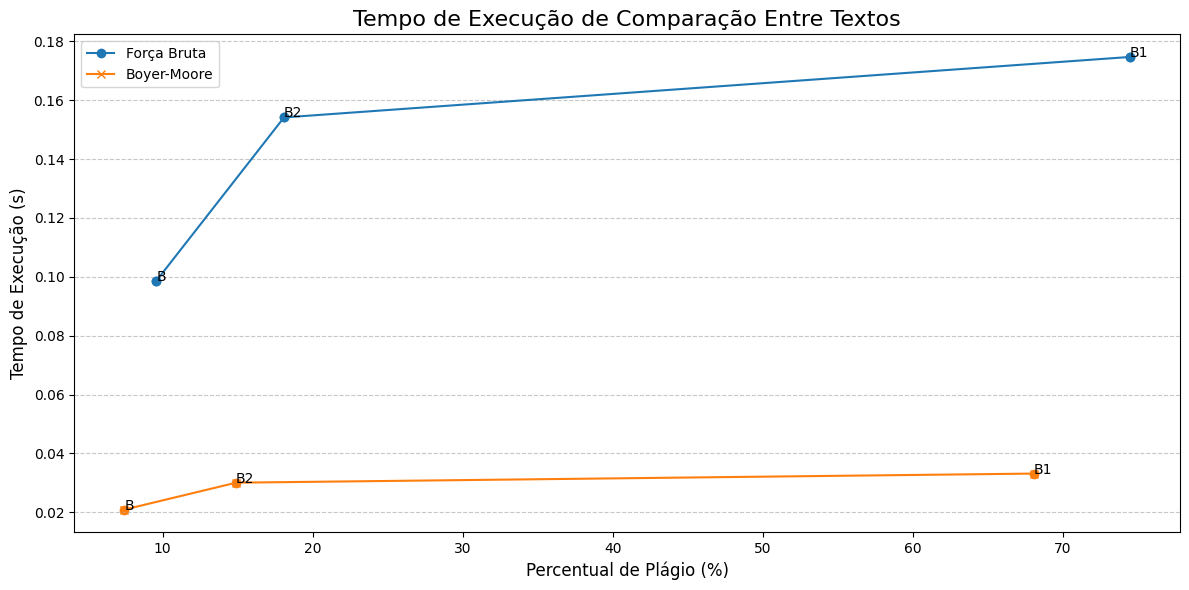

In [106]:
# ordenar df_b pelo percentual de plágio
df_b = df_b.sort_values('Plágio FB (%)')
# plotar o gráfico do tempo de exec pelo percentual de plágio
plt.figure(figsize=(12, 6))
plt.plot(df_b['Plágio FB (%)'], df_b['Tempo FB (s)'], label='Força Bruta', marker='o')
plt.plot(df_b['Plágio BM (%)'], df_b['Tempo BM (s)'], label='Boyer-Moore', marker='x')
plt.scatter(df_b['Plágio FB (%)'], df_b['Tempo FB (s)'])
plt.scatter(df_b['Plágio BM (%)'], df_b['Tempo BM (s)'])
plt.xlabel('Percentual de Plágio (%)', fontsize=12)
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.title('Tempo de Execução de Comparação Entre Textos', fontsize=16)
# lable nos pontos
for i, txt in enumerate(df_b.index):
    plt.annotate(txt, (df_b['Plágio FB (%)'][i], df_b['Tempo FB (s)'][i]))
    plt.annotate(txt, (df_b['Plágio BM (%)'][i], df_b['Tempo BM (s)'][i]))
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [54]:
# tamanho dos arquivos
tamanhos = {
    'Texto A': len(a),
    'Texto A1': len(a1),
    'Texto A2': len(a2),
    'Texto B': len(b),
    'Texto B1': len(b1),
    'Texto B2': len(b2),
}
print(tamanhos)

{'Texto A': 654, 'Texto A1': 657, 'Texto A2': 662, 'Texto B': 2466, 'Texto B1': 2400, 'Texto B2': 2523}
